In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
# 1. 加载数据
data = pd.read_excel('risk.xlsx', sheet_name='Sheet1', header=None).values
input_data = data[:, :17]  # 前17列为输入
expected_output = data[:, 17]  # 第18列为期望输出

In [ ]:
# 2. 划分训练集和测试集
train_size = 13
input_train = input_data[:train_size, :]
output_train = expected_output[:train_size]
input_test = input_data
output_test = expected_output

In [ ]:
# 3. 数据归一化
input_scaler = MinMaxScaler(feature_range=(0, 1))  # 输入数据归一化
output_scaler = MinMaxScaler(feature_range=(0, 1))  # 输出数据归一化

input_train = input_scaler.fit_transform(input_train)
input_test = input_scaler.transform(input_test)
output_train = output_scaler.fit_transform(output_train.reshape(-1, 1)).flatten()
output_test = output_scaler.transform(output_test.reshape(-1, 1)).flatten()

# 4. 构建神经网络模型
model = Sequential([
    Dense(10, activation='sigmoid', input_dim=input_train.shape[1]),  # 第一隐含层
    Dense(6, activation='tanh'),  # 第二隐含层
    Dense(1, activation='linear')  # 输出层
])

# 5. 编译模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. 训练模型
history = model.fit(input_train, output_train, epochs=500, batch_size=4, verbose=1)

# 7. 使用模型进行预测
predicted_output = model.predict(input_test).flatten()
predicted_output = output_scaler.inverse_transform(predicted_output.reshape(-1, 1)).flatten()  # 还原预测输出
output_test = output_scaler.inverse_transform(output_test.reshape(-1, 1)).flatten()  # 还原期望输出



Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2909 - mae: 1.4783   
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9819 - mae: 1.3641 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5932 - mae: 1.2198 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2568 - mae: 1.0847 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0494 - mae: 0.9894 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8178 - mae: 0.8666 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5838 - mae: 0.7285 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4190 - mae: 0.6015 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3507 - mae: 0.5400 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3116 - mae: 0.4842 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1960 - mae: 0.3528 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1188 - mae: 0.2756 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0

网络输出值:
[-0.01467387  0.2878467   0.48449475  1.0062091   0.22773968  0.38890857
  0.31280708  0.22236331  0.36064062  0.43245667  0.27129173  0.26879105
  0.43781424  0.42049178  0.40015906  0.22106408  0.25022894]
期望值:
[0.         0.26191497 0.68307677 1.         0.25551472 0.38631021
 0.25791762 0.24045225 0.31423126 0.41241789 0.26019266 0.25629921
 0.35907976 0.4241413  0.39420297 0.25823946 0.25326676]
误差:
[ 0.01467387 -0.02593174  0.19858203 -0.00620914  0.02777505 -0.00259835
 -0.05488946  0.01808894 -0.04640936 -0.02003879 -0.01109907 -0.01249184
 -0.07873448  0.00364952 -0.00595609  0.03717538  0.00303782]


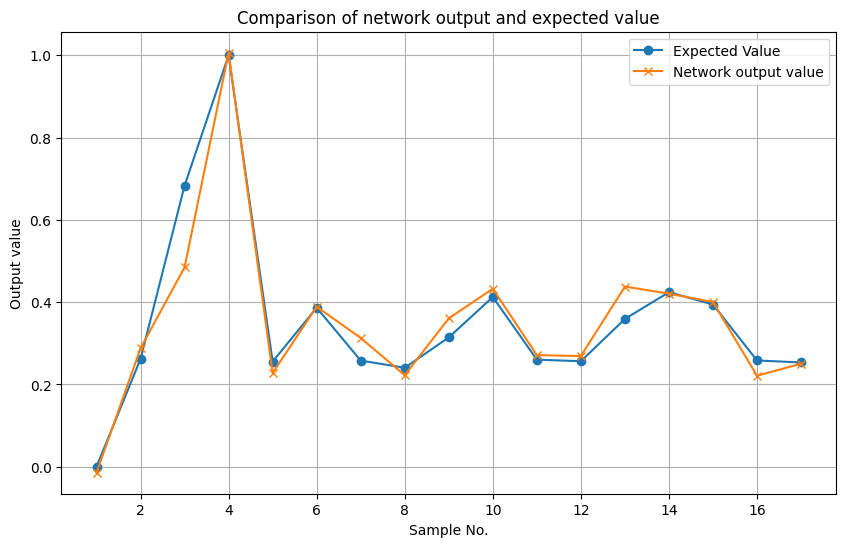

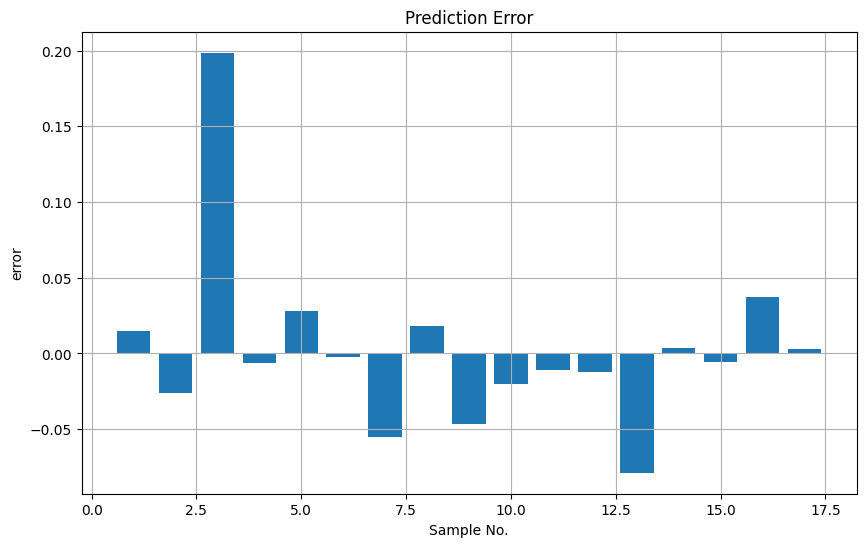

模型保存为 neural_network_model.h5


In [ ]:
# 8. 计算误差
error = output_test - predicted_output
print("网络输出值:")
print(predicted_output)
print("期望值:")
print(output_test)
print("误差:")
print(error)

# 9. 可视化网络输出与期望值对比
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(output_test) + 1), output_test, 'o-', label='Expected Value')
plt.plot(range(1, len(predicted_output) + 1), predicted_output, 'x-', label='Network output value')
plt.xlabel('Sample No.')
plt.ylabel('Output value')
plt.title('Comparison of network output and expected value')
plt.legend()
plt.grid()
plt.show()

# 10. 可视化误差
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(error) + 1), error)
plt.xlabel('Sample No.')
plt.ylabel('error')
plt.title('Prediction Error')
plt.grid()
plt.show()

# 保存模型
model.save('neural_network_model.h5')
print("模型保存为 neural_network_model.h5")